In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk

plt.style.use('dark_background')


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')

In [3]:
df


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [4]:
df['Text'].values[1] 
# we see its text reviews 
# sentiment analysis on this 

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

In [5]:
print(df.shape)
df = df.head(500)
df.shape

(568454, 10)


(500, 10)

In [6]:
# we will use 500 rows out of 500k

## EDA

In [7]:
df['Score'] # we see whem, individual score occuts 


0      5
1      1
2      4
3      2
4      5
      ..
495    5
496    5
497    4
498    4
499    5
Name: Score, Length: 500, dtype: int64

In [8]:
df['Score'].value_counts() #number of times each score occurs

5    339
4     70
3     37
1     36
2     18
Name: Score, dtype: int64

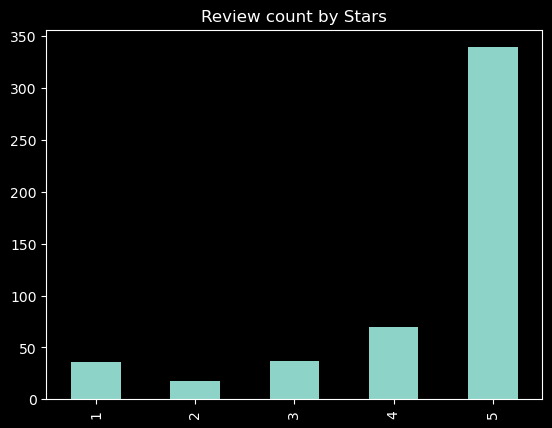

In [9]:
ax = df['Score'].value_counts().sort_index().plot(kind='bar', title='Review count by Stars')
# we know dataset is biased towards 5 star reviews, good we know this early 


## NLTK

In [10]:
sample = df['Text'][50] # taking sample 50
print(sample)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [11]:
nltk.word_tokenize(sample)
#NLTK can tokenize words
#NLP, need to convert text into numbers , so computer can understand

['This',
 'oatmeal',
 'is',
 'not',
 'good',
 '.',
 'Its',
 'mushy',
 ',',
 'soft',
 ',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [12]:
tokens = nltk.word_tokenize(sample)
tokens[:10]
# first 10, so we remember , what we selected here 

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [13]:
tagged1 = nltk.pos_tag(tokens)
tagged1[:11]
#post tagging , for part of speech tagging 
#will run on each of the tokens 
# https://www.guru99.com/pos-tagging-chunking-nltk.html

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ',')]

In [14]:
entities = nltk.chunk.ne_chunk(tagged1)
entities.pprint() 
    #pretty print 
#chunk, group tokens

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


In [15]:
# they found - Quaker is an Organization -

## Stage-1 Vader Sentiment Score

In [16]:
# VADER (Valence Aware Dictionary and Sentiment Reasoner) 
# positive, negative, neural 
# adds up for these groups 
    # does not account relationship between words 
    # just summation 


In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()
# we can now run this on  text 

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [18]:
sia.polarity_scores('This is an amazing day, wow')
#compound -1 to +1

{'neg': 0.0, 'neu': 0.345, 'pos': 0.655, 'compound': 0.8225}

In [19]:
sia.polarity_scores('This day was not as well as yesterday, at all!')


{'neg': 0.19, 'neu': 0.81, 'pos': 0.0, 'compound': -0.2746}

In [20]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)
        # the score results will be stored in myid? ok
    
    
# run this on the entire dataset 
# total=len(df)): [ Progress bar ]
# res for [ storing the results ]

  0%|          | 0/500 [00:00<?, ?it/s]

In [21]:

pd.DataFrame(res)
vaders = pd.DataFrame(res).T
 #problem , wrong orientation
    # .T , flip everything horizontally
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
    #reset index and rename index as Id
vaders = vaders.merge(df, how='left')
    #merge it with the original dataframe, will be a Left merge 
#res - Results 
#but we want it in Dataframe


In [22]:
# we added , sentiment score , + _ - , to df
vaders

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,0.059,0.791,0.150,0.8215,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,0.025,0.762,0.212,0.9848,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,0.041,0.904,0.055,0.1280,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


## VADER Results Visualized 

<function matplotlib.pyplot.show(close=None, block=None)>

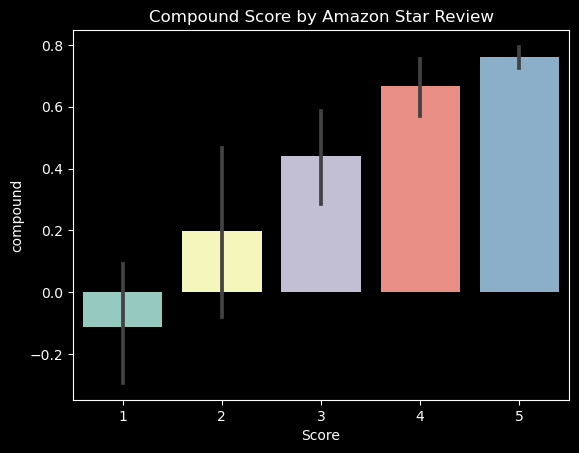

In [27]:
ax = sns.barplot(data=vaders, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Review')
plt.show

In [23]:
# more positive the compound , higher the score [ exactly the trend that should be]
#exact trend we want 

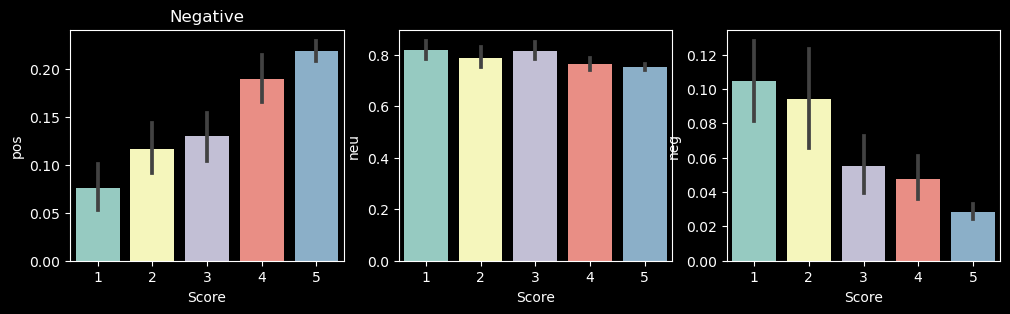

In [28]:
fig, axs = plt.subplots(1,3, figsize=(12, 3))
sns.barplot(data=vaders, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[0].set_title('Neutral')
axs[0].set_title('Negative')
plt.show()



# Stage 3. Roberta Pretrained Model


In [ ]:
#transformer model
#previous model included singular words, not relationships or the context inbetween 
# Deep learning can pick up in the intentions between the words

In [50]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
#again

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)


In [ ]:
#we are basically doing transfer learning - weights are already trained 
# from twitter 


In [57]:
task = 'sentiment'
MODEL1 = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(MODEL1)
model2 = AutoModelForSequenceClassification.from_pretrained(MODEL1)


OSError: We couldn't connect to 'https://huggingface.co' to load this file, couldn't find it in the cached files and it looks like cardiffnlp/twitter-roberta-base-sentiment is not the path to a directory containing a file named config.json.
Checkout your internet connection or see how to run the library in offline mode at 'https://huggingface.co/docs/transformers/installation#offline-mode'.

In [48]:
#VADER
print(sample)
sia.polarity_scores(sample)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [51]:
#Roberta
encoded_text = tokenizer(sample, return_tensors='pt')
output = model(**encoded_text)
output

NameError: name 'tokenizer' is not defined

SyntaxError: invalid syntax (57249059.py, line 1)